In [65]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker 
import matplotlib.pyplot as plt
from pathlib import Path


In [67]:
api_key = Path("YT_API_KEY.txt").read_text()
channel_handle = '@alextheanalyst' # Alex The Analyst
                   
api_service_name = 'youtube'
api_version = 'v3'

# Initialize YouTube Data API client using google api library
youtube = build(api_service_name, api_version, developerKey=api_key)

# Analyze YouTube Channel Alex The Analyst
## Function to request channel information

In [96]:
# request channel information using youtube data api
def request_channel_info(youtube, channel_handle):    
    
    request = youtube.channels().list(
        part="snippet,contentDetails,statistics",
        forHandle=channel_handle        
        )
    
    response = request.execute()
    #return response   
        
    response_data = response['items'][0]
    data = {'Channel_name': response_data['snippet']['title'],
            'Description': response_data['snippet']['description'],
            'Subscribers': response_data['statistics']['subscriberCount'],
            'Views': response_data['statistics']['viewCount'],
            'Total_videos': response_data['statistics']['videoCount'],
            'Playlist_ID': response_data['contentDetails']['relatedPlaylists']['uploads']            
            }              
        
        
    #return the statistic data of Channel 'Alex The Analyst'
    return data

In [ ]:
channel_statistics = request_channel_info(youtube,channel_handle)
# print(channel_statistics)

{'Channel_name': 'Alex The Analyst', 'Description': 'My name is Alex Freberg and on this channel I will be going over everything you need to know to become a Data Analyst. If you are wanting to make a career change or learn the skills needed to become a Data Analyst, be sure to subscribe to stay up to date on all my latest content.\n\nYou can find me on LinkedIn at:\nhttps://www.linkedin.com/in/alex-freberg/\n\nAlexTheAnalyst.com\nhttps://www.alextheanalyst.com/\n\nDiscord Channel:\nhttps://discord.gg/rxZUjNvRzR\n\nTwitter:\n@Alex_TheAnalyst\n\n', 'Subscribers': '1030000', 'Views': '48385332', 'Total_videos': '356', 'Playlist_ID': 'UU7cs8q-gJRlGwj4A8OmCmXg'}


In [98]:
# convert channel data to panda DataFrame
channel_data = pd.DataFrame([channel_statistics])
#channel_data

In [99]:
# Save channel data to a csv file
channel_data.to_csv('channel_data.csv')

## Funtion to get video IDs

In [101]:
def get_playlist_videos(youtube, play_list_id): 
    
    video_ids = []
    next_page_token = None   
    
    while True: 
        request = youtube.playlistItems().list(
            part='snippet,contentDetails',
            maxResults=50,
            pageToken=next_page_token,
            playlistId=play_list_id
            )
        
        response = request.execute()
        #return response
    
        for item in response['items']:
            video_id = item['contentDetails']['videoId']               
            video_ids.append(video_id)
        
        next_page_token=response.get('nextPageToken')
        #print(next_page_token)
        if not next_page_token:
            break    
           
    return video_ids
   
   

In [81]:
playlist_ID = channel_data.loc[channel_data['Channel_name']=='Alex The Analyst','Playlist_ID'].iloc[0]

In [ ]:
video_ids = get_playlist_videos(youtube, playlist_ID)
#print(video_ids)

['xb5-UX-jYw0', 'V3ouFOBQP0k', 'oi9W142ELN0', '5n52mlp9Ym0', 'hgp91KvbJV4', '1ql4kNv0_qY', 'r5512UY3MTc', 'XuOcmjIbFGg', 'Ka2mDrKEAhg', 'k8nBWL6K884', 'WpX2F2BS3Qc', 'cd_jj0IRmaA', 'OcG0B4ny1cE', 'hXpt8zj_ajc', 'ItZlTixh6Bs', 'PEWMgtu-1e4', 'hCmEfxy-BXg', 'TtCBz1lutsY', 'Ihmq-qeA5Pc', 'wQQR60KtnFY', 'oHte3qFa-oY', 'P7p2OZj9ewU', 'I0vQ_VLZTWg', 'tnz72ywhCoo', 'j8FSP8XuFyk', 'zXnQNytHCPM', 'osA1QpBcxRs', 'Mdq1WWSdUtw', 'CZt2BUpgjgw', 't1fQBD4B7xk', 'OT1RErkfLNQ', 'rxyLC247h6E', 'AycpRKyRagE', 'K2GfrERtliU', 'xmVyaT-RuVo', 'amb9bciHGSI', 'hgaVi4sOHkM', 'YSjbGET6R1A', 'vDVcXXfc9e8', 'Vg6ys_JvXzg', 'sge9qTf8GdY', '9ur0OpMADuM', 'UTMuL_86gSQ', 'sEImMaovc1Q', 'ZYps6TmBkWk', 'zv1nfZTYpio', 'rn0dSsYXhIE', 'siHou7lObbo', 'wJiJXD7MVoY', 'BzwAZ1k3WEY', '5q2u8__sVhs', 'UJbNEH0_nGY', 'oz2K4HUNMW4', 'Y-4ri9QjsTI', 'F5v2dRYU5IA', '_R6K1aNtKpE', '5tKmTdvEAVk', 'QYd-RtK58VQ', 'c5ko0sedE7k', '4UltKCnnnTA', 'BV5ckMNNvi4', 'QMUZ5HfWMRc', '7b8ViCqD9JM', '7vnxpcqmqNQ', 'uEk07jXdKOo', 'UC7uvOqcUTs', '1KEbiqRW

## Function to get video details

In [103]:
def get_video_block_details(youtube, video_block_ids):
    """
    get video details with maximal 50 video IDs
    """
    
    request = youtube.videos().list(
        part='snippet,contentDetails,statistics',
        id=','.join(video_block_ids)
        )
    response = request.execute()
    
    return response


In [104]:
def get_all_video_details(youtube,video_ids):
    """
    get details of all videos
    """
    
    video_details = []
    video_len=len(video_ids)
    
    for i in range(0,video_len,50):
        video_block_ids=video_ids[i:i+50]        
        video_details.append(get_video_block_details(youtube, video_block_ids))   

    return video_details   
        

In [110]:
video_details = get_all_video_details(youtube,video_ids)
#type(video_details)
video_details

[{'kind': 'youtube#videoListResponse',
  'etag': '6ZlFtmUjEXJRBc7VYgDbQAtb1E8',
  'items': [{'kind': 'youtube#video',
    'etag': 'Mf62eALrwldCJuMlrnsjX0jMlVo',
    'id': 'xb5-UX-jYw0',
    'snippet': {'publishedAt': '2025-04-08T12:01:32Z',
     'channelId': 'UC7cs8q-gJRlGwj4A8OmCmXg',
     'title': 'How to Lie with Data | Averages',
     'description': "It's so easy to lie with data!\n\nIn fact, it happens all the time, but we just may not realize it (cough cough *all news networks*)\n\nIn this series I show you some of the most common ways to lie with data!\n\n____________________________________________ \n\nRESOURCES:\n\n💻Analyst Builder - https://www.analystbuilder.com/\n\n📖Take my Full MySQL Course Here: https://bit.ly/3tqOipr\n📖Take my Full Python Course Here: https://bit.ly/48O581R\n📖Practice Technical Interview Questions: https://bit.ly/46pDqqL\n\nCoursera Courses:\nGoogle Data Analyst Certification: https://coursera.pxf.io/5bBd62\nData Analysis with Python - https://coursera.p

## Function to get video statistics

In [128]:
def get_video_stats(youtube,video_ids):
    """
    get the statistics of provided videos
    """
    
    all_video_stats = []
    video_details = get_all_video_details(youtube,video_ids)
    
    for details in video_details:
        for item in details['items']:                     
            stats_data = {'Video_ID': item['id'],
                          'Video_Title': item['snippet']['title'],
                          'Video_Published':item['snippet']['publishedAt'],                          
                          'View_Count': item['statistics'].get('viewCount',0),
                          'Like_Count': item['statistics'].get('likeCount',0),                      
                          'Comment_Count': item['statistics'].get('commentCount',0),  
                          'Tags': item['snippet'].get('tags', []),
                          'Duration': item['contentDetails']['duration']        
                         }
            all_video_stats.append(stats_data)
        
    return all_video_stats
        

In [ ]:
all_video_stats = get_video_stats(youtube,video_ids)
# print(all_video_stats)

[{'Video_ID': 'xb5-UX-jYw0', 'Video_Title': 'How to Lie with Data | Averages', 'Video_Published': '2025-04-08T12:01:32Z', 'View_Count': '2795', 'Like_Count': '160', 'Comment_Count': '10', 'Tags': ['Data Analyst', 'Data Analyst job', 'Data Analyst Career', 'Data Analytics', 'Alex The Analyst'], 'Duration': 'PT6M47S'}, {'Video_ID': 'V3ouFOBQP0k', 'Video_Title': 'How to Lie with Data | Percentages and Baseline Numbers', 'Video_Published': '2025-04-01T12:00:46Z', 'View_Count': '3601', 'Like_Count': '179', 'Comment_Count': '7', 'Tags': ['Data Analyst', 'Data Analyst job', 'Data Analyst Career', 'Data Analytics', 'Alex The Analyst'], 'Duration': 'PT5M18S'}, {'Video_ID': 'oi9W142ELN0', 'Video_Title': '1 Million YouTube Play Button Unboxing!', 'Video_Published': '2025-03-25T12:01:10Z', 'View_Count': '2654', 'Like_Count': '221', 'Comment_Count': '76', 'Tags': ['Data Analyst', 'Data Analyst job', 'Data Analyst Career', 'Data Analytics', 'Alex The Analyst'], 'Duration': 'PT7M40S'}, {'Video_ID': '

In [ ]:
video_data = pd.DataFrame(all_video_stats)
# print(video_data)

        Video_ID                                        Video_Title  \
0    xb5-UX-jYw0                    How to Lie with Data | Averages   
1    V3ouFOBQP0k  How to Lie with Data | Percentages and Baselin...   
2    oi9W142ELN0            1 Million YouTube Play Button Unboxing!   
3    5n52mlp9Ym0  Maven Analytics + Analyst Builder Lifetime Acc...   
4    hgp91KvbJV4           How to Lie with Data | Misleading Graphs   
..           ...                                                ...   
351  4rfr6A3lO-Y  Data Analyst Resume | Reviewing My Resume! | F...   
352  OTq2NRy_AGs  Working at a Big Company Vs Small Company | To...   
353  ya28cb3zFGE      Data Analyst Salary | 100k with No Experience   
354  Hsi2BG0SOiQ  Truth About Big Companies | Told by a Fortune ...   
355  6lQzbk6_OTw                  Top 3 Data Analyst Skills in 2020   

          Video_Published View_Count Like_Count Comment_Count  \
0    2025-04-08T12:01:32Z       2795        160            10   
1    2025-04-01T1

In [127]:
video_data.to_csv('video_data.csv')

In [112]:
video_data[['View_Count','Like_Count','Comment_Count']] = video_data[['View_Count','Like_Count','Comment_Count']].apply(pd.to_numeric)

In [119]:
top10_videos = video_data.sort_values(by='View_Count', ascending=False)[:10]
top10_videos

,Video_Title,View_Count,Like_Count,Comment_Count
257,Data Analyst Portfolio Project | SQL Data Expl...,2112285,36219,4327
160,FREE Data Analyst Bootcamp!!,1858686,45728,1737
340,SQL Basics Tutorial For Beginners | Installing...,1459173,18585,2058
161,How to Become a Data Analyst in 2023 (Complete...,1306098,43278,1301
317,What Does a Data Analyst Actually Do?,1016414,19659,501
217,Full Project in Excel | Excel Tutorials for Be...,961989,20180,1146
315,Top 5 Reasons Not to Become a Data Analyst,926433,19758,1050
231,Pivot Tables in Excel | Excel Tutorials for Be...,900989,18100,441
93,Installing MySQL and Creating Databases | MySQ...,887286,11622,1228
211,Database vs Data Warehouse vs Data Lake | What...,885646,22972,336


## Plot the statistics results

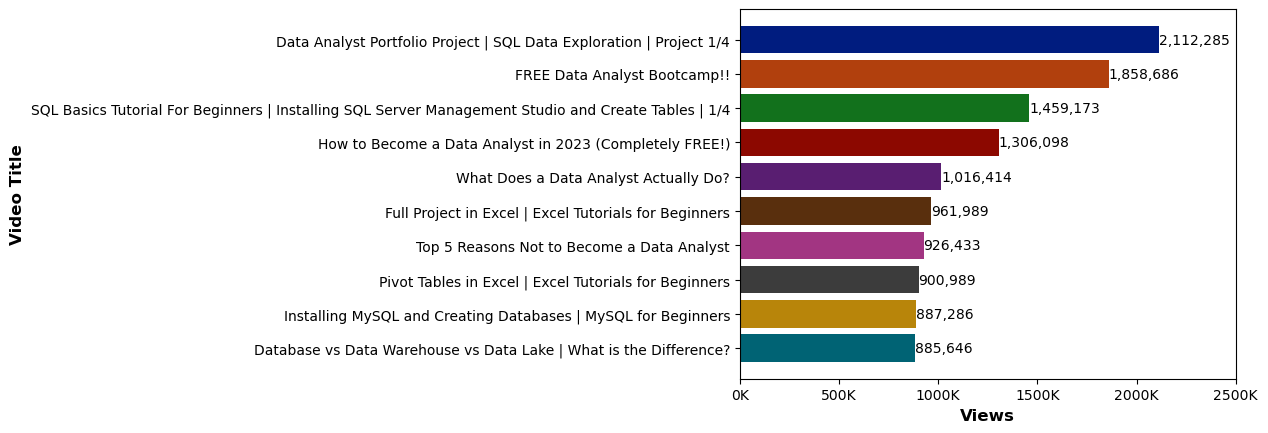

In [115]:
ax=plt.subplot()
colors = sns.color_palette("dark", len(top10_videos))
bars = ax.barh(top10_videos['Video_Title'], top10_videos['View_Count'],color=colors)
ax.invert_yaxis()
ax.bar_label(bars, fmt=lambda x: "{:,.0f}".format(x))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1e3)}K'))
ax.set_xlim(right=2500000)
ax.set_xlabel('Views',fontsize=12, fontweight='bold')
ax.set_ylabel('Video Title',fontsize=12, fontweight='bold')
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)


In [122]:
video_data.to_csv('video_data.csv')